# **Modul 10 - Thresholding**

Nama : Alfan Olivan

NIM : 2141720078

## **Tugas Praktikum**

### **Global Threshold**

* Import library

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

* Load gradient img

In [11]:
img_gradient = cv2.imread('/content/drive/MyDrive/PCVK/gradient.jpg', cv2.IMREAD_GRAYSCALE)

* Define function

In [12]:
def global_thresholding(image, technique, threshold=170):
    if technique == "BINARY":
        _, thresholded = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    elif technique == "BINARY_INV":
        _, thresholded = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY_INV)
    elif technique == "TRUNC":
        _, thresholded = cv2.threshold(image, threshold, 255, cv2.THRESH_TRUNC)
    elif technique == "TOZERO":
        _, thresholded = cv2.threshold(image, threshold, 255, cv2.THRESH_TOZERO)
    elif technique == "TOZERO_INV":
        _, thresholded = cv2.threshold(image, threshold, 255, cv2.THRESH_TOZERO_INV)
    else:
        raise ValueError("Invalid thresholding technique. Choose from BINARY, BINARY_INV, TRUNC, TOZERO, or TOZERO_INV.")

    return thresholded

* Thresholding

In [13]:
binary_threshold_img = global_thresholding(img_gradient, "BINARY")
binary_inv_threshold_img = global_thresholding(img_gradient, "BINARY_INV")
trunc_threshold_img = global_thresholding(img_gradient, "TRUNC")
tozero_threshold_img = global_thresholding(img_gradient, "TOZERO")
tozero_inv_threshold_img = global_thresholding(img_gradient, "TOZERO_INV")

* Show image

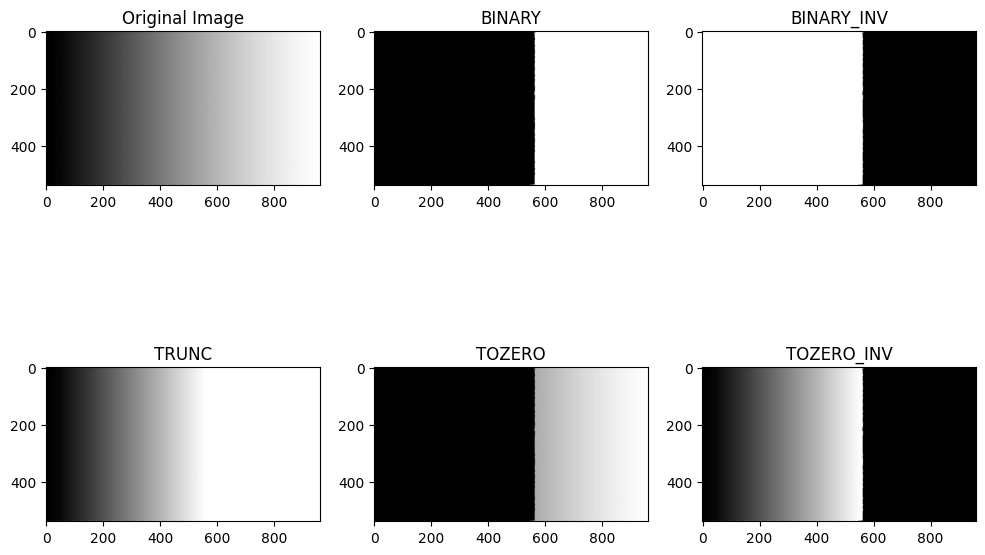

In [26]:
plt.figure(figsize=(12, 8))
plt.subplot(231), plt.imshow(img_gradient, cmap="gray"), plt.title("Original Image")
plt.subplot(232), plt.imshow(binary_threshold_img, cmap="gray"), plt.title("BINARY")
plt.subplot(233), plt.imshow(binary_inv_threshold_img, cmap="gray"), plt.title("BINARY_INV")
plt.subplot(234), plt.imshow(trunc_threshold_img, cmap="gray"), plt.title("TRUNC")
plt.subplot(235), plt.imshow(tozero_threshold_img, cmap="gray"), plt.title("TOZERO")
plt.subplot(236), plt.imshow(tozero_inv_threshold_img, cmap="gray"), plt.title("TOZERO_INV")

plt.show()

### **Otsu Threshold**

* Define function

In [27]:
def otsu_thresholding(image, v=1.0):
    # Step 1: Compute the histogram of the input image
    histogram = np.histogram(image, bins=256, range=(0, 256))[0]

    # Step 2: Normalize the histogram
    histogram = histogram / float(np.sum(histogram))

    # Step 3: Initialize variables
    max_variance = 0
    best_threshold = 0
    total_intensity = np.sum(np.arange(256) * histogram)

    for threshold in range(256):
        # Calculate probability of class 0 and class 1
        p0 = np.sum(histogram[:threshold])
        p1 = 1 - p0

        # Calculate mean of class 0 and class 1
        m0 = np.sum(np.arange(threshold) * histogram[:threshold]) / p0 if p0 > 0 else 0
        m1 = (total_intensity - p0 * m0) / p1 if p1 > 0 else 0

        # Calculate between-class variance
        variance = p0 * p1 * (m0 - m1) ** 2

        # Update best threshold if variance is higher, adjusted by v
        adjusted_variance = variance / (1 + v * (p0 * p1) ** 2)
        if adjusted_variance > max_variance:
            max_variance = adjusted_variance
            best_threshold = threshold

    # Step 4: Apply the best threshold to the image
    thresholded_image = np.where(image > best_threshold, 255, 0).astype(np.uint8)

    return thresholded_image

* Load original image

In [28]:
img_ktp = cv2.imread('/content/drive/MyDrive/PCVK/KTP/ktp.png', cv2.IMREAD_GRAYSCALE)

* Otsu thresholding

In [32]:
global_thresholded_image_binary = global_thresholding(img_ktp, "BINARY", 90)
otsu_thresholded_image = otsu_thresholding(img_ktp, 1)

* Show image

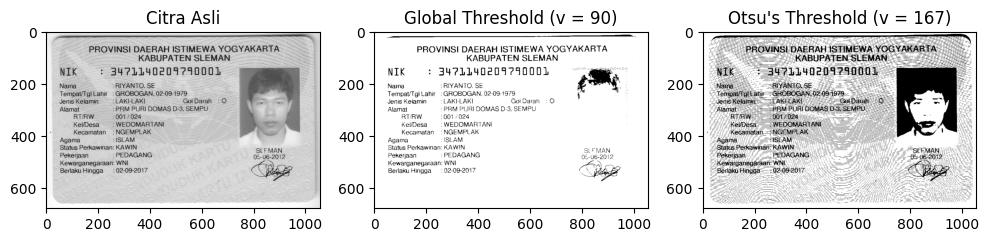

In [35]:
plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(img_ktp, cmap="gray"), plt.title("Citra Asli")
plt.subplot(132), plt.imshow(global_thresholded_image_binary, cmap="gray"), plt.title("Global Threshold (v = 90)")
plt.subplot(133), plt.imshow(otsu_thresholded_image, cmap="gray"), plt.title("Otsu's Threshold (v = 167)")
plt.show()

### **Menampilkan Histogram Segmentasi Citra**

* Define Function

In [62]:
def calculate_rgb_histogram(image):
    # Split the BGR image into its color channels
    blue_channel, green_channel, red_channel = cv2.split(image)

    # Set the number of bins and the range for the histogram
    num_bins = 256
    hist_range = (0, 256)

    # Calculate histograms for each channel
    blue_hist = cv2.calcHist([blue_channel], [0], None, [num_bins], hist_range)
    green_hist = cv2.calcHist([green_channel], [0], None, [num_bins], hist_range)
    red_hist = cv2.calcHist([red_channel], [0], None, [num_bins], hist_range)

    # Normalize the histograms
    blue_hist /= blue_hist.sum()
    green_hist /= green_hist.sum()
    red_hist /= red_hist.sum()

    return blue_hist, green_hist, red_hist

In [66]:
def calculate_and_show_gray_histogram(image):
    # Calculate a histogram for the single channel (grayscale image)
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Normalize the histogram
    hist /= hist.sum()

    return hist

* Segment image & get histogram

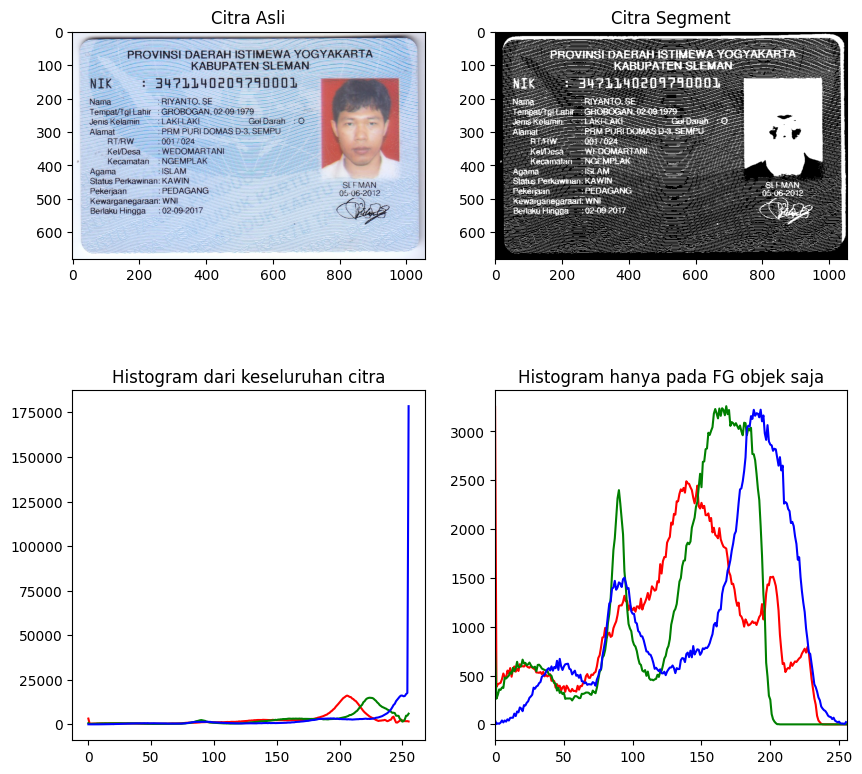

In [69]:
filename = ('/content/drive/MyDrive/PCVK/KTP/ktp.png')
img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
  hist0 = cv2.calcHist([img],[i],None,[256],[0,256])
  plt.subplot(2,2,3),plt.plot(hist0,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv2.calcHist([img],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])

plt.show()

### **Segmentasi Warna**

* Load gambar

In [71]:
filename = ('/content/drive/MyDrive/PCVK/KTP/ktp.png')
img6 = cv2.imread(filename)
img6 = cv2.cvtColor(img6 ,cv2.COLOR_BGR2RGB)

pixel_values = img6.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

* Membuat model k-means

In [72]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 150, 0.1)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None,
criteria, 10, cv2.KMEANS_RANDOM_CENTERS)


* Melakukan masking

In [73]:
#konversi titik centroid kedalam integer
centers = np.uint8(centers)

#flattening label array
labels = labels.flatten()

#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]

# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img6.shape)

# membuat model masked image
masked_image = np.copy(img6)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 2] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img6.shape)

* Menampilkan hasil masking

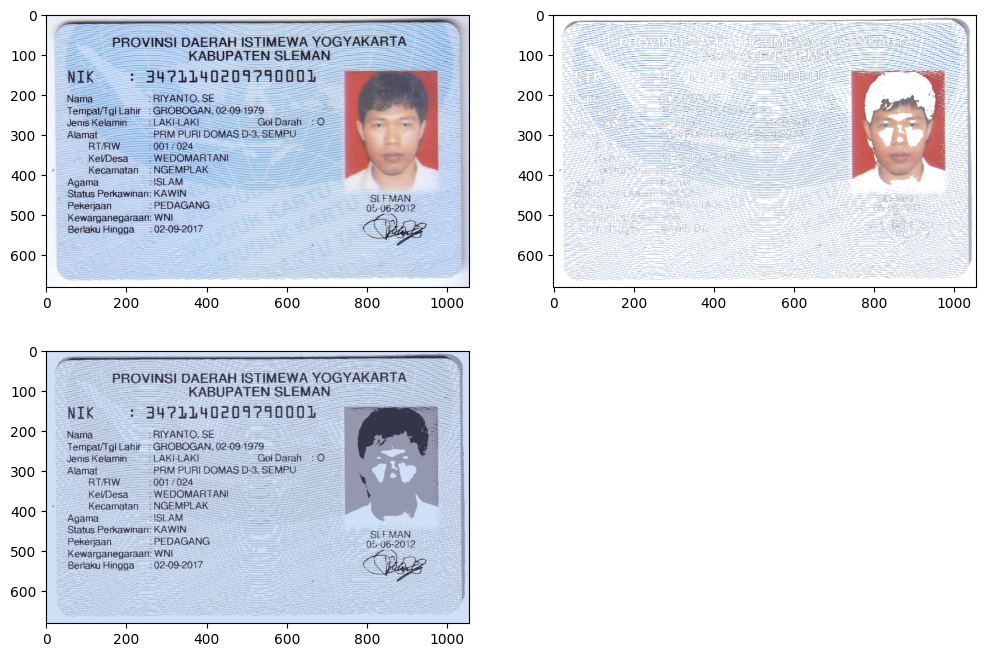

In [77]:
plt.figure(figsize = (12,8))
plt.subplot(2,2,1),plt.imshow(img6)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)
plt.show()

### **Tugas**

In [81]:
!pip install pytesseract
!apt-get install tesseract-ocr

import pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


* Membuat function

In [142]:
def read_ktp(ktp_path):
    img = cv2.imread(ktp_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ## (2) Threshold
    th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
    threshed = threshed[5:650][20:1000]

    ## (3) Detect
    result = pytesseract.image_to_string(threshed)

    final = []

    ## (5) Normalize
    for word in result.split("\n"):
        if "”—" in word:
            word = word.replace("”—", ":")

        # Normalize NIK
        if "NIK" in word:
            nik_char = word.split()
        if "?" in word:
            word = word.replace("?", "7")
        if ">" in word:
            word = word.replace(">", ":")
        if "(" in word:
            word = word.replace("(", "/")

        final.append(word)

    return final, threshed

* Laod gambar KTP

In [138]:
# Load the image in BGR format
image_path = '/content/drive/MyDrive/PCVK/KTP/ktp.png'
bgr_image = cv2.imread(image_path)

# Convert BGR to RGB
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

* Melakukan OCR

In [143]:
ocr_ktp, thresholded_image = read_ktp(image_path)

* Menampilkan komparasi citra original dengan hasil threshold

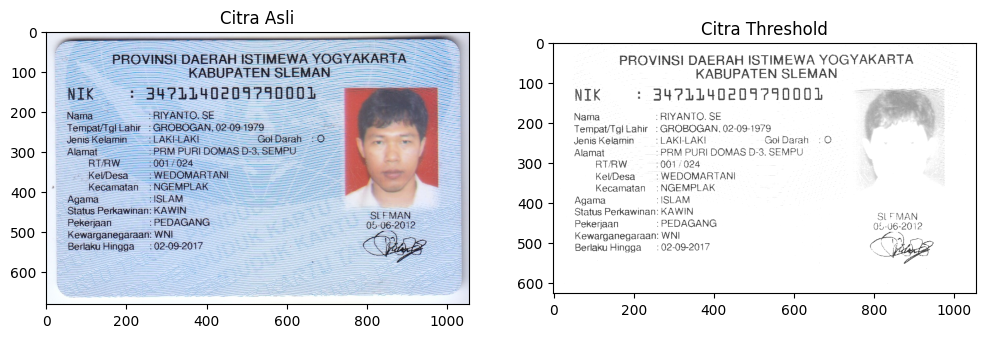

In [144]:
plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(rgb_image), plt.title("Citra Asli")
plt.subplot(122), plt.imshow(thresholded_image, cmap="gray"), plt.title("Citra Threshold")
plt.show()

* Hasil OCR

In [145]:
ocr_text = "\n".join(ocr_ktp)
print(ocr_text)

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 3471140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN, 02-09-1979

denis Kelamin : LAKI-LAKI Gol Darah +O

Alamat PRM PURI DOMAS D-3. SEMPU
RTARW :001 /024

Kel/Desa : WEDOMARTANI
Kecamatan :NGEMPLAK

Agama ‘ISLAM
Status Perkawinan: KAWIN
Pekerjaan : PEDAGANG

Kewarganegaraan: WNI
Berlaku Hingga _: 02-09-2017

 

